# **Exploratory Data Analysis (EDA)**
## **Project: Patients Attending Medical Appointments**

# **Introduction**
### When a patient makes a medical appointment, receives all the instructions, and does not attend the appointment, Should we blame the patient? Or the hospital? Or blame both?
### In this project, we will talk about the problem of patients not attending their appointments, knowing the reasons of this problem, and proposing solutions to it.
### Also, we will answer some questions, which are:
*  ### What are the top three features affecting patients' attendance for their appointments?
* ### Is there a correlation between one feature and another?
* ### What do you suggest to solve this problem?




## **Data Features**
### **1. Patient ID**
Identification of a patient.

### **2. Appointment ID**
Identification of each appointment.

### **3. Gender**
What is patient gender? (Male or Female)

### **4. Scheduled Day**
The day someone called or registered the appointment, this is before appointment of course.

### **5. Appointment Day**
The day of the actuall appointment, when the patient have to visit the doctor.

### **6. Age**
How old is the patient?

### **7. Neighborhood**
Where the appointment takes place?

### **8. Scholarship**
Does the patient have a scholarship or not? (True or False) 
Observation, this is a broad topic, consider reading this [article](https://www.kaggle.com/joniarroba/noshowappointments)

### **9. Hypertension**
Does the patient have hypertension or not? (True or False)

### **10. Diabetes**
Does the patient have diabetes or not? (True or False)

### **11. Alcoholism**
Does the patient have alcoholism or not? (True or False)

### **12. Handicap**
Does the patient have a handicap or not? (True or False)

### **13. SMS_received**
Did the patient get one or more messages?  (True or False)

### **14. No-show**
Did the patient attend the appointment or not?  (True or False)


# **Data Cleaning and Preparing**

### Download the dataset

The dataset called "No Attendance", which contains 110,527 medical appointments its 14 associated variables (features). The most important one is "no-show", which will tell us if the patient attends the appointment or not. 

you can download the dataset from [here](https://www.kaggle.com/joniarroba/noshowappointments)


### Import libraries and load the dataset

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

In [27]:
df = pd.read_csv("Medical_Appointment.csv")
df.head(7)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes


### Summary and statistical information on the dataset

In [28]:
# Display a number of functions and statistical information that can be useful to us

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [30]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Change the column names to corrected and clearer names

In [31]:
# Feature names used (before) are either contiguous and unclear, or contain misspellings

df.rename(columns = {'PatientId':'Patient_ID',
                        'AppointmentID':'Appointment_ID',
                        'ScheduledDay':'Scheduled_Day',
                        'AppointmentDay':'Appointment_Day',
                        'Neighbourhood':'Neighborhood',
                        'Hipertension':'Hypertension',
                        'Handcap':'Handicap',
                        'No-show': 'Attending'
                       }, inplace=True)
df.head(7)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attending
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes


### Drop useless columns

In [32]:
# These features will not be used in this project because they will not add anything or have too many values, and may cause confusion and problems in the analysis

df.drop(['Patient_ID', 'Appointment_ID', 'Neighborhood'], axis=1, inplace=True)
df.head(7)

,Gender,Scheduled_Day,Appointment_Day,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attending
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,0,1,0,0,0,0,No
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,0,0,0,0,0,0,Yes


### Convert `Scheduled_Day` and `Appointment_Day` to " yyyy-mm-dd " formula, to make calculating the difference of days between them easier

In [33]:
# We do this step so that we can calculate the number of days between dates

df.Scheduled_Day = pd.to_datetime(df.Scheduled_Day).dt.date.astype('datetime64[ns]')
df.Appointment_Day = pd.to_datetime(df.Appointment_Day).dt.date.astype('datetime64[ns]')

df.head(7)

,Gender,Scheduled_Day,Appointment_Day,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attending
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No
5,F,2016-04-27,2016-04-29,76,0,1,0,0,0,0,No
6,F,2016-04-27,2016-04-29,23,0,0,0,0,0,0,Yes


### Calculating how many days left from `Scheduled_Day` to `Appointment_Day`

In [34]:
# We do this step to know the effect of the number of days on the target

Days_Left = (df.Appointment_Day - df.Scheduled_Day).dt.days
df.insert(3, "Days_Left", Days_Left)

df.head(7)

,Gender,Scheduled_Day,Appointment_Day,Days_Left,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attending
0,F,2016-04-29,2016-04-29,0,62,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,0,56,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,0,62,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,0,8,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,0,56,0,1,1,0,0,0,No
5,F,2016-04-27,2016-04-29,2,76,0,1,0,0,0,0,No
6,F,2016-04-27,2016-04-29,2,23,0,0,0,0,0,0,Yes


### Remove irrational values in the columns `Age` and `Days_Left`

In [35]:
# There is one value (-1) in "Age" column doesn't make sense, so we'll solve this problem

print("Column Age values, before revoming: ")
print(np.sort(df.Age.unique()))
print('\n')

print(f"Number of values that should be removed in Age column are {df.Age[df.Age < 0].count()}")
print('\n')

df = df[df.Age >= 0]

print("Column Age values, after revoming: ")
print(np.sort(df.Age.unique()));

Column Age values, before revoming: 
[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]


Number of values that should be removed in Age column are 1


Column Age values, after revoming: 
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 102 115]


In [36]:
# There are two of values (-1, -6) in "Days_Left" column doesn't make sense, so we'll solve this problem

print(f"Column Days_Left values, before revoming: ")
print(np.sort(df.Days_Left.unique()))
print('\n')

print(f"Number of values that should be removed in Days_Left column are {df.Days_Left[df.Days_Left < 0].count()}")
print('\n')

df = df[df.Days_Left >= 0]

print(f"Column Days_Left values, after revoming: ")
print(np.sort(df.Days_Left.unique()));


Column Days_Left values, before revoming: 
[ -6  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15
  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33
  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98 101 102 103 104 105 107 108
 109 110 111 112 115 117 119 122 123 125 126 127 132 133 139 142 146 151
 155 162 169 176 179]


Number of values that should be removed in Days_Left column are 5


Column Days_Left values, after revoming: 
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76

In [37]:
df.head(7)

,Gender,Scheduled_Day,Appointment_Day,Days_Left,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attending
0,F,2016-04-29,2016-04-29,0,62,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,0,56,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,0,62,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,0,8,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,0,56,0,1,1,0,0,0,No
5,F,2016-04-27,2016-04-29,2,76,0,1,0,0,0,0,No
6,F,2016-04-27,2016-04-29,2,23,0,0,0,0,0,0,Yes


### Deal With Outliers

In [38]:
# There is one outlier in "Age" column that causes a problem in the analysis, so we have to deal with it

print(f"Column Age values, before dealing with the outlier: ")
print(np.sort(df.Age.unique()))
print('\n')

print(f"Number of outliers that should be dealing with in Age column are {df.Age[df.Age > 102].count()}")
print('\n')

df.Age[df.Age > 102] = df.Age.median()

print(f"Column Age values, after dealing with the outlier: ")
print(np.sort(df.Age.unique()));


# Add scatter plot with "Days_Left" bar plot
# Add Heat map as the first plot in Data Visualization & Scatter polt for all in one plot
# Add "Q & A" Part (Question in the Proposal)
# Add Conclousion Part

Column Age values, before dealing with the outlier: 
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 102 115]


Number of outliers that should be dealing with in Age column are 5


Column Age values, after dealing with the outlier: 
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99

# **Data Visualization**

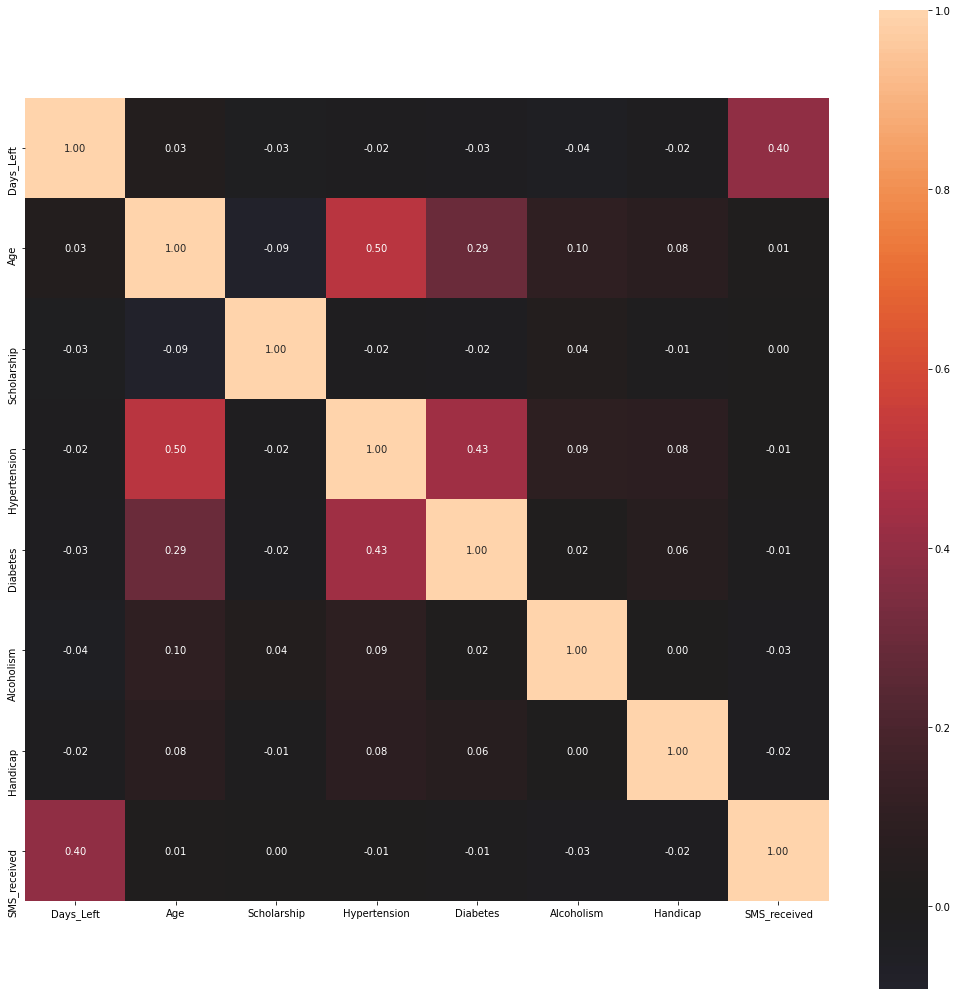

In [39]:
# graph of the correlation between the features, to know the correlation between them

plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), center=0, vmax=1, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10});

As can be seen above, the values in each cell represents a meaning, for example:

* 1 : This value means that the correlation between the two features is a positive correlation

* -1 : This value means that the correlation between the two features is negative correlation

* 0 : This value means that there is no correlation between the two features
 
 
So, we can say The more the value in the cell is to "1" or "-1", the more there is a correlation between the two features

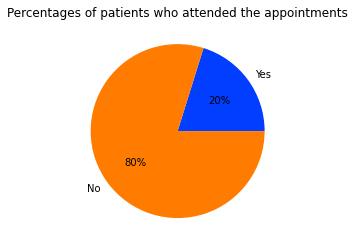

In [40]:
# graph of the percentage of patients who attended the appointments and those who did not attend in the form of a pie chart

attend_values = [df.Attending[df.Attending == 'Yes'].count(), df.Attending[df.Attending == 'No'].count()]
attend_labels = ['Yes', 'No']
colors = sns.color_palette('bright')[0:5]

pie_chart = plt.pie(attend_values, labels = attend_labels, colors = colors, autopct='%.0f%%')
plt.title("Percentages of patients who attended the appointments")
plt.show()


As you can see above, the percentage of patients who did not attend their appointments is 80%, and this indicates that there is a problem that must be considered and resolved.

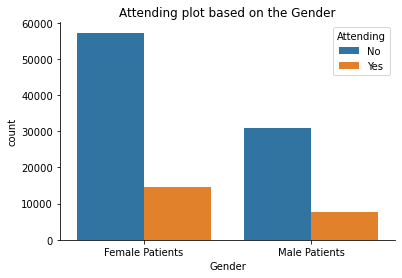

In [41]:
# graph of the number of female patients who attended the appointments and those who did not, and their comparison with the number of male patients, in the form of a count chart

count_gender_plot = sns.countplot(x = df.Gender, hue = df.Attending, data = df)
count_gender_plot.set_title("Attending plot based on the Gender")
x_ticks_labels=['Female Patients', 'Male Patients']
count_gender_plot.set_xticklabels(x_ticks_labels)
sns.despine() 
plt.show()

As shown above, the number of female patients who did not attend the appointment is more than male patients, and also the number of female patients who showed up to the appointment more than male patients.
What we conclude from this is that the number of female patients who scheduled an appointment is more than male patients.

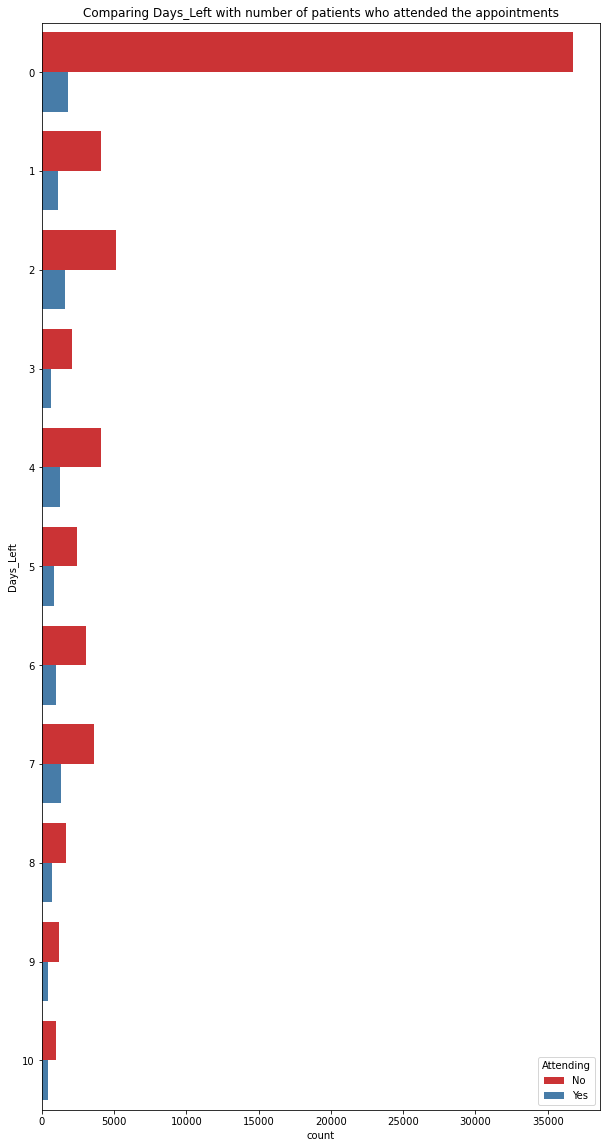

In [42]:
# graph of the number of patients who attended the appointments, and those who did not, compared with how many days from schedule day to appointment day

Days_values = np.sort(df.Days_Left.unique())
Days_values_Plot = Days_values[0:11]

plt.figure(figsize=(10,20))
count_days_plot = sns.countplot(y = df.Days_Left, hue = df.Attending, palette = "Set1", order = Days_values_Plot)
count_days_plot.set_title("Comparing Days_Left with number of patients who attended the appointments")
plt.show()

As you can see above, the number of patients who attend appointments increases and decreases as the number of days increases from the day of the appointment to the day of the appointment (`Days_left`), but the number of patients continues to decrease after a week has passed since the scheduled appointment.

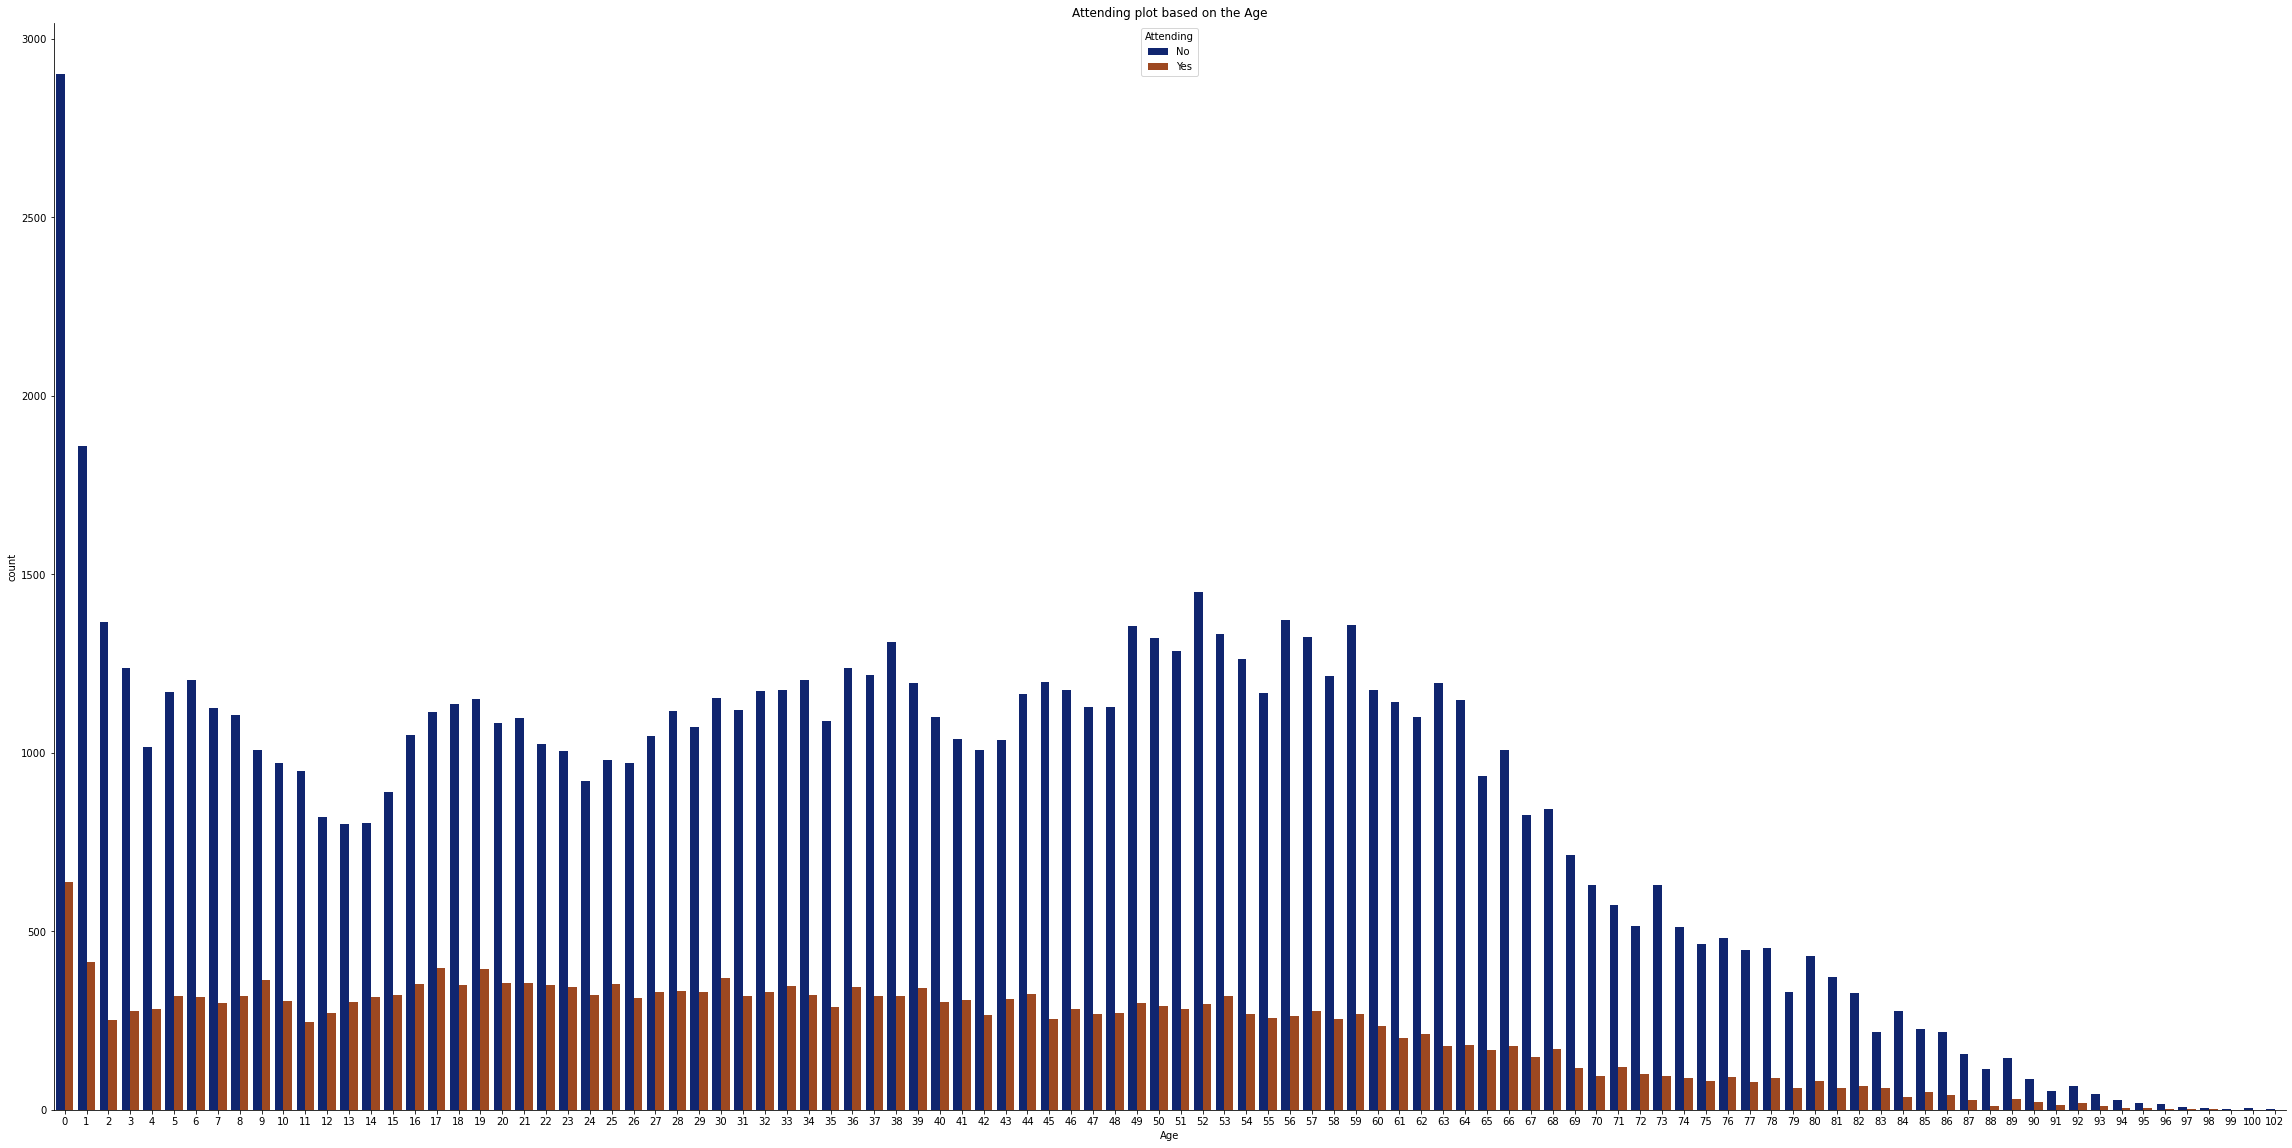

In [43]:
# graph of the number of female patients who attended the appointments and those who did not, and their comparison with the number of male patients, in the form of a count chart

plt.figure(figsize=(40,20))
Ages_plot = sns.countplot(x = df.Age, hue = df.Attending,palette = "dark", data = df)
Ages_plot.set_title("Attending plot based on the Age")
sns.despine() 
plt.show()

As shown above, the number of patients who attend appointments goes through an increase and decrease with increasing age, but the number of patients continues to decrease after age 53.

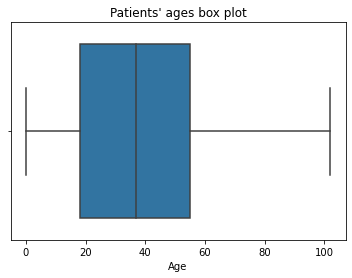

<Figure size 2160x360 with 0 Axes>

In [44]:
# graph of patients' ages in the form of a box plot

box_plot = sns.boxplot(x = df.Age)
box_plot.set_title("Patients' ages box plot")
plt.figure(figsize=(30,5));

As can be seen above, the lower quartile (25%) is equal to 18, the median age (50%) is equal to 37, the upper quartile (75%) is equal to 55. There are some outliers which we will not take into account in our analysis.

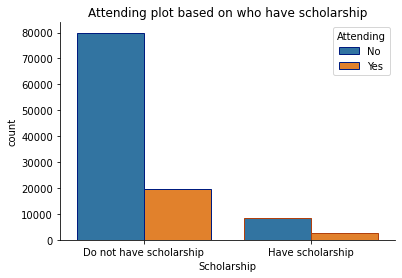

In [45]:
# Graph of the number of patients who have a scholarship, and attended their appointments, and compare them with those who do not have a scholarship

count_scholarship_plot = sns.countplot(x = df.Scholarship, hue = df.Attending, data = df, edgecolor=sns.color_palette("dark", 3))
count_scholarship_plot.set_title("Attending plot based on who have scholarship")
x_ticks_labels=['Do not have scholarship', 'Have scholarship']
count_scholarship_plot.set_xticklabels(x_ticks_labels)
sns.despine() 
plt.show()

As can be noticed above, the number of patients who attended the appointments and have scholarship is much higher than the number of patients who attended the appointments and do not have scholarship.

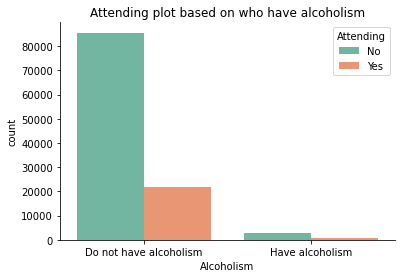

In [46]:
# Graph of the number of patients who have alcoholism, and attended their appointments, and compare them with those who do not have alcoholism

count_alcoholism_plot = sns.countplot(x = df.Alcoholism, hue = df.Attending, data = df, palette="Set2")
count_alcoholism_plot.set_title("Attending plot based on who have alcoholism")
x_ticks_labels=['Do not have alcoholism', 'Have alcoholism']
count_alcoholism_plot.set_xticklabels(x_ticks_labels)
sns.despine() 
plt.show()

As shown, the number of patients who attended appointments and have alcoholism is very small compared to the number of patients who attended appointments and do not have alcoholism.

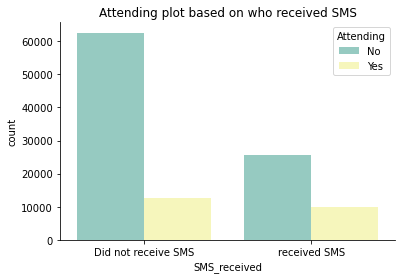

In [47]:
# Graph of the number of patients who received SMS, and attended their appointments, and compare them with those who did not receive SMS

count_SMS_plot = sns.countplot(x = df.SMS_received, hue = df.Attending, data = df, palette="Set3")
count_SMS_plot.set_title("Attending plot based on who received SMS")
x_ticks_labels=['Did not receive SMS', 'received SMS']
count_SMS_plot.set_xticklabels(x_ticks_labels)
sns.despine() 
plt.show()

As shown above, the number of patients who attended the appointments and received SMS is more than those who did not receive SMS.

# **Questions and Answers**

### What are the top three features affecting patients' attendance for their appointments?

There are many features that affect patients' attendance to their appointments, but the three most prominent features are:

1. Alcoholism 

2. Scholarship

3. Gender

### Is there a correlation between one feature and another?

Based on the heatmap, there are some features that have a correlation with other features, for example:
* Age and Hypertension
* Diabetes and Hypertension
* Days_Left and SMS_received

### What do you suggest to solve this problem?

In my opinion, the best solution to a problem is to find out its causes. Therefore, in order to solve the problem of patients not attending their appointments, we must look for the reasons and try to reduce them as much as possible, for example:

* `Age`: Patients over the age of fifty, we ask them to choose a family member (son, daughter, brother, nephew, ... etc.) as responsible for him, and we remind them of the appointment every two or three days by calling or sending messages.


* `Scholarship`: We are trying to increase the number of patients who have a scholarship, by asking the competent authorities and convincing them, because some cannot go to the appointment because they do not have the money for treatment.


* `Alcoholism`: Spreading awareness about the dangers of alcohol addiction, persuading the alcohol addicted patient to join clinics to quit drinking alcohol, and hypnotizing the alcoholic patient 24 hours before the appointment (if needed).


* `SMS_received`: Sending an appointment reminder message to the patient’s phone on the scheduled day, and another message 24 hours before the appointment day, and messages every two or three days if `Days_Left` is more than three days.